In [48]:
import numpy as np
import pandas as pd
#from io import StringIO
import os
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
h = 8
w = h*1.61803398875
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)

#from matplotlib import rc
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

h = 8
w = 8*1.61803398875

In [49]:
def ii_freeair():
    T = np.arange(0.134,2.001,0.001)
    TL = np.log10(T)
    U = (1.04504577747 + 3.24299066475*TL)   
    Y = 10**(1.43534136453000 - 0.4437493776910*U
        + 0.168825414684*U**2 + 0.0348138030308*U**3
        - 0.010435192824*U**4)

    S = np.arange(2.0,100.1,0.1)
    SL = np.log10(S)
    V = (-2.67912519532 + 2.30629231803*SL)
    X = 10**(0.599008468099 - 0.40463292088*V
         - 0.01427219460820*V**2 + 0.00912366316617*V**3
         - 0.00067506814040*V**4 - 0.00800863718901*V**5
         + 0.00314819515931*V**6 + 0.00152044783382*V**7
         - 0.00074702658990*V**8)
    return T, Y, S, X

def ii_surface():
    T1 = np.arange(0.17,2.42,0.01)
    TL1 = np.log10(T1)
    U1 = (0.832468843425 + 3.0760329666*TL1)   
    Y1 = 10**(1.57159240621 - 0.502992763686*U1
        + 0.1713356452350*U1**2 + 0.0450176963051*U1**3
        - 0.0118964626402*U1**4)

    T2 = np.arange(2.41,100.1,0.01)
    TL2 = np.log10(T2)
    U2 = (-2.91358616806 + 2.40697745406*TL2)
    Y2 = 10**(0.719852655584 - 0.384519026965*U2
        - 0.02601316706301*U2**2 + 0.00595798753822*U2**3
        + 0.01454452610700*U2**4 - 0.00663289334734*U2**5
        - 0.00284189327204*U2**6 + 0.00136448162270*U2**7)
    return T1, Y1, T2, Y2

def ppd_freeair():
    T = np.arange(0.134,100.0,0.001)
    TL = np.log10(T)
    U = (-0.80501734056 + 1.37407043777*TL)   
    Y = 10**(- 0.0423733936826 + 1.36456871214000*U
        - 0.0570035692784*U**2 - 0.18283222479600*U**3
        + 0.0118851436014*U**4 + 0.04326486876270*U**5  
        - 0.0007997367834*U**6 - 0.00436073555033*U**7)
    return T, Y

def ppd_surface():
    '''
    Returns the complete positive phase duration in three
    array sets that equate to the scaled distances the
    equaitons are valid for.
    '''
    T1 = np.arange(0.450,2.54,0.001)
    TL1 = np.log10(T1)
    U1 = (-0.1790217052 + 5.25099193925*TL1)   
    Y1 = 10**(- 0.72867177600500*U1**0 + 0.13014371767500*U1**1
              + 0.13487251195400*U1**2 + 0.03915742769060*U1**3
              - 0.00475933664702*U1**4 - 0.00428144598008*U1**5)
    
    T2 = np.arange(2.54,7.00,0.001)
    TL2 = np.log10(T2)
    U2 = (-5.85909812338 + 9.2996288611*TL2)   
    Y2 = 10**(0.20096507334000*U2**0 - 0.02979442689760*U2**1
            + 0.03063295428800*U2**2 + 0.01834055740860*U2**3
            - 0.01739646662110*U2**4 - 0.00106321963633*U2**5
            + 0.00562060030977*U2**6 + 0.00016182174990*U2**7
            - 0.00068601889440*U2**8)

    T3 = np.arange(7.00,100.00,0.001)
    TL3 = np.log10(T3)
    U3 = (-4.92699491141 + 3.46349745571*TL3)   
    Y3 = 10**(0.572462469964*U3**0 + 0.09330353040090*U3**1
         - 0.000584942088300*U3**2 - 0.00226884995010*U3**3
         - 0.002959085915050*U3**4 + 0.00148029868929*U3**5)
    return T1, Y1, T2, Y2, T3, Y3

def ip_surface():
    """
    Returns one array
    function [incident pressure, distance] = kingery_bulmash_ip(d)
    kingery_bulmash_ii calculates the Kingery Bulmash incident pressure at
    a distance d from from a 1 lb TNT hemispherical surface burst.
    incident pressure and distance consists of the pressure in psi and
    the distance in feet.
    S. Kevin McNeill, 1.0 (Explicitly not copyrighted).
    This function is released to the public domain; Any use is allowed.
    """    
    T1 = np.arange(0.170,100,0.001)
    TL1 = np.log10(T1)
    U1 = (-0.756579301809 + 1.35034249993*TL1)   
    Y1 = 10**(+ 1.94225020130000*U1**0 - 1.69589887410000*U1**1
              - 0.15415937684600*U1**2 + 0.514060730593*U1**3
              + 0.09885343652740*U1**4 - 0.293912623038*U1**5
              - 0.02668112345019*U1**6 + 0.109097496421*U1**7
              + 0.00162846756311*U1**8 - 0.0214631030242*U1**9
              + 0.00014567233820*U1**10 + 0.00167847752266*U1**11)
    return T1, Y1

In [50]:
P1, Q1, P2, Q2, P3, Q3 = ppd_surface()
I1, J1, I2, J2 = ii_surface()
IP1, JP1 = ip_surface()

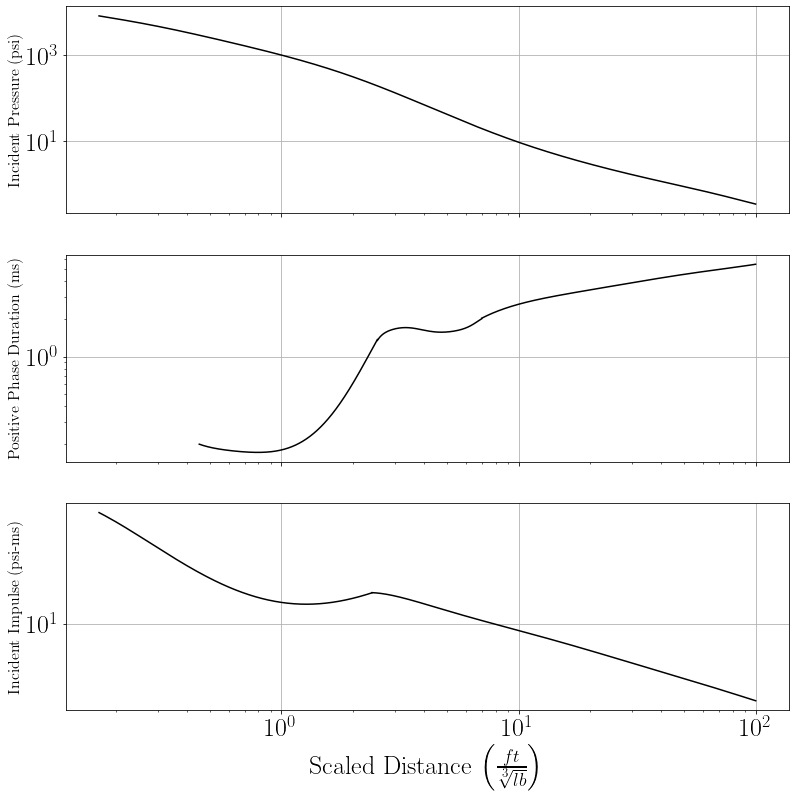

In [83]:
fig = plt.figure(figsize=(w,w))
x = 16


ax1 = fig.add_subplot(3,1,1,sharex=ax3)
ax1.loglog(IP1,JP1, 'k', label='Incident Pressure')
ax1.grid()
ax1.set_ylabel(r'Incident Pressure (psi)', fontsize=x)
plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = fig.add_subplot(3,1,2,sharex=ax3)
ax2.loglog(P1,Q1, 'k', label='Positive Phase Duration')
ax2.loglog(P2,Q2, 'k')
ax2.loglog(P3,Q3, 'k')
ax2.grid()
ax2.set_ylabel(r'Positive Phase Duration (ms)', fontsize=x)
plt.setp(ax2.get_xticklabels(), visible=False)

ax3 = fig.add_subplot(3,1,3)
ax3.loglog(I1,J1, 'k', label='Incident Impulse')
ax3.loglog(I2,J2, 'k')
ax3.grid()
ax3.set_xlabel(r'Scaled Distance $\left( \frac{ft}{\sqrt[3]{lb}} \right)$')
ax3.set_ylabel(r'Incident Impulse (psi-ms)', fontsize=x);

working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "5_reports/figures"
file_name = "ip_ppd_ii.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()